# Participation \#5

### By: Andrey Pristinsky

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loaded in

In [129]:
# full 30min dataset for streaming video on vpn
yes = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102.csv")
# full 30min dataset for web browsing on vpn
no = pd.read_csv("apristin-novideo-vpn-windows-20201109.csv")

# 5 minute chunks of streaming video on vpn
yes_0 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-0.csv")
yes_1 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-1.csv")
yes_2 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-2.csv")
yes_3 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-3.csv")
yes_4 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-4.csv")
yes_5 = pd.read_csv("apristin-youtube[1440p60]-1x-vpn-windows-noisy-20201102-5.csv")
# 5 minute chuncks of web browsing on vpn
no_0 = pd.read_csv("apristin-novideo-vpn-windows-20201109-0.csv")
no_1 = pd.read_csv("apristin-novideo-vpn-windows-20201109-1.csv")
no_2 = pd.read_csv("apristin-novideo-vpn-windows-20201109-2.csv")
no_3 = pd.read_csv("apristin-novideo-vpn-windows-20201109-3.csv")
no_4 = pd.read_csv("apristin-novideo-vpn-windows-20201109-4.csv")
no_5 = pd.read_csv("apristin-novideo-vpn-windows-20201109-5.csv")

### Now that I have the function below that cleans the extended columns and creates individual dataframes for each row's extended columns in the original dataset, I can further examine the data and engineer new features.

In [130]:
# This function returns a dataframe with the packets times, sizes, and directions for a single row of data
def three_cols(row):
    time = list(map(int, row['packet_times'].split(';')[0:-1]))
    size = list(map(int, row['packet_sizes'].split(';')[0:-1]))
    dirs = list(map(int, row['packet_dirs'].split(';')[0:-1]))
    dict1 = {'packet_time': time, 'packet_size': size, 'packet_dir': dirs}
    return pd.DataFrame(dict1)

### The two functions I created below will be useful in developing features related to the mean and the standard deviation of the packet sizes in each row.

In [131]:
# This function finds the mean of every row's packet sizes and returns the dataframe in addition to two columns
# that contain the packets means of direction 1 and the packets means of direction 2
def mean_feature(dataset):
    df = dataset.copy()
    mean1_total = []
    mean2_total = []
    for i in range(df.shape[0]):
        row = three_cols(df.iloc[i])
        ones = row.loc[row['packet_dir'] == 1]
        twos = row.loc[row['packet_dir'] == 2]
        if len(ones) == 0:
            mean1 = 0
        if len(twos) == 0:
            mean2 = 0
        if len(ones) == 1:
            mean1 = int(ones['packet_size'])
        if len(twos) == 1:
            mean2 = int(twos['packet_size'])
        if len(ones) > 1:
             mean1 = ones['packet_size'].mean()
        if len(twos) > 1:
            mean2 = twos['packet_size'].mean()
        mean1_total.append(mean1)
        mean2_total.append(mean2)
    return df.assign(dir1_packets_mean = mean1_total, dir2_packets_mean = mean2_total)

In [132]:
# This function find the standard deviation of every row's packet sizes and returns the dataframe in addition to two
# columns that contain the packets standard deviations of direction 1 and the packets standard deviations of direction 2
def std_feature(dataset):
    df = dataset.copy()
    std1_total = []
    std2_total = []
    for i in range(df.shape[0]):
        row = three_cols(df.iloc[i])
        ones = row.loc[row['packet_dir'] == 1]
        twos = row.loc[row['packet_dir'] == 2]
        if len(ones) == 0:
            std1 = 0
        if len(twos) == 0:
            std2 = 0
        if len(ones) == 1:
            std1 = 0
        if len(twos) == 1:
            std2 = 0
        if len(ones) > 1:
             std1 = ones['packet_size'].std()
        if len(twos) > 1:
            std2 = twos['packet_size'].std()
        std1_total.append(std1)
        std2_total.append(std2)
    return df.assign(dir1_packets_std = std1_total, dir2_packets_std = std2_total)

### I called the two functions to develop four possible new features below. The examples I have show two features at a time, since each function above creates two features based on the direction that the packets were travelling. Two features created for mean, and two features created for STD. The sections for analysis of packet size means and packet size standard deviations describe in detail why these features could be of importance.

In [133]:
#Example of mean packet size feature extraction on the no streaming dataset:
mean_no = mean_feature(no)
mean_no[['dir1_packets_mean', 'dir2_packets_mean']].head(5)

,dir1_packets_mean,dir2_packets_mean
0,110.800000,112.0
1,122.000000,0.0
2,378.000000,0.0
3,415.000000,0.0
4,207.666667,138.5


In [134]:
#Example of mean packet size feature extraction on the streaming dataset:
mean_yes = mean_feature(yes)
mean_yes[['dir1_packets_mean', 'dir2_packets_mean']].head(5)

,dir1_packets_mean,dir2_packets_mean
0,128.526316,1338.856253
1,128.161744,1335.556810
2,129.873112,1342.952806
3,131.913413,1320.275556
4,134.000000,134.000000


In [135]:
#Example of standard deviation packet size feature extraction on the no streaming dataset:
std_no = std_feature(no)
std_no[['dir1_packets_std', 'dir2_packets_std']].head(5)

,dir1_packets_std,dir2_packets_std
0,6.572671,8.485281
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,142.071578,2.121320


In [136]:
#Example of standard deviation packet size feature extraction on the streaming dataset:
std_yes = std_feature(yes)
std_no[['dir1_packets_std', 'dir2_packets_std']].head(5)

,dir1_packets_std,dir2_packets_std
0,6.572671,8.485281
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,142.071578,2.121320


## Analysis of finding the Packet Size Means

(0.0, 1400.0)

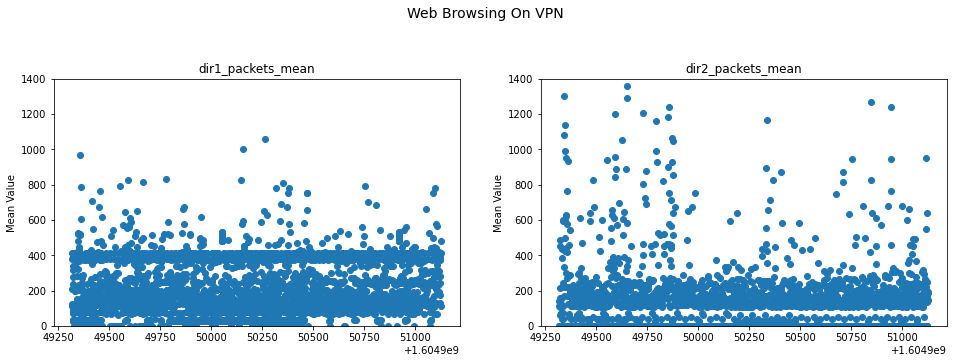

In [137]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.suptitle("Web Browsing On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.ylabel("Mean Value")
plt.title("dir1_packets_mean")
plt.scatter(mean_no['Time'], mean_no["dir1_packets_mean"])
plt.ylim((0,1400))
plt.subplot(2, 2, 2)
plt.ylabel("Mean Value")
plt.title("dir2_packets_mean")
plt.scatter(mean_no['Time'], mean_no["dir2_packets_mean"])
plt.ylim((0,1400))

(0.0, 1400.0)

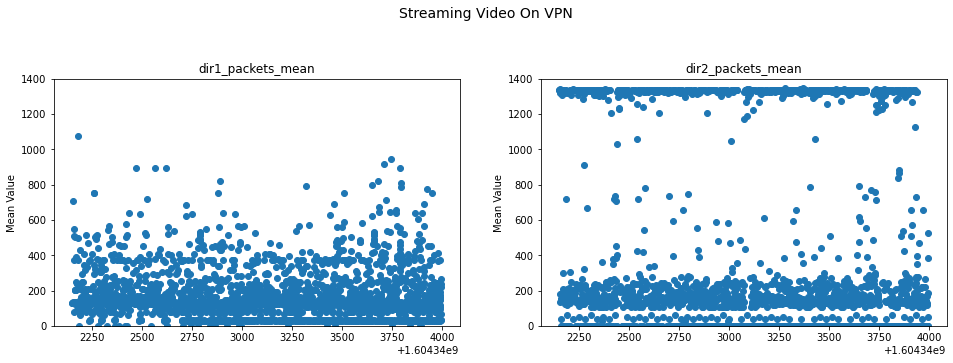

In [138]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.suptitle("Streaming Video On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.ylabel("Mean Value")
plt.title("dir1_packets_mean")
plt.scatter(mean_yes['Time'], mean_yes["dir1_packets_mean"])
plt.ylim((0,1400))
plt.subplot(2, 2, 2)
plt.ylabel("Mean Value")
plt.title("dir2_packets_mean")
plt.scatter(mean_yes['Time'], mean_yes["dir2_packets_mean"])
plt.ylim((0,1400))

### When looking at the means of the 4 graphs above, we can see that the averages of web browsing vs streaming differ over time based on the direction of the packets.

### The reason creating a feature for the means of direction 1 is beneficial is that while both graphs seem to have roughly the same data points, we can spot that there seems to be a large amount of values directly at 400 for web browsing, which differs from streaming video as otherwise the two graphs look alike. This is something that can warrant further analysis as to why the packets average out at 400 for web browsing in direction 1.

### The reason for creating a feature for the means of direction 2 is that once again, the graphs between browsing and streaming look roughly identical except for the fact that the streaming graph has a large amount of averages at roughly 1300, which differs from the browsing where there are hardly any data point averages from the ranges of 1200-1400.

### The 4 histograms below show the same data but in different format, where instead the counts of the averages are being displayed to highlight the differences between streaming and browsing with the same differences of averages at either 400 or 1200-1400 range.

(array([2040.,  817.,   87.,   46.,   40.,   15.,   21.,    7.,    6.,
           6.]),
 array([   0.        ,  135.75750514,  271.51501028,  407.27251542,
         543.03002056,  678.7875257 ,  814.54503084,  950.30253598,
        1086.06004112, 1221.81754626, 1357.57505141]),
 <BarContainer object of 10 artists>)

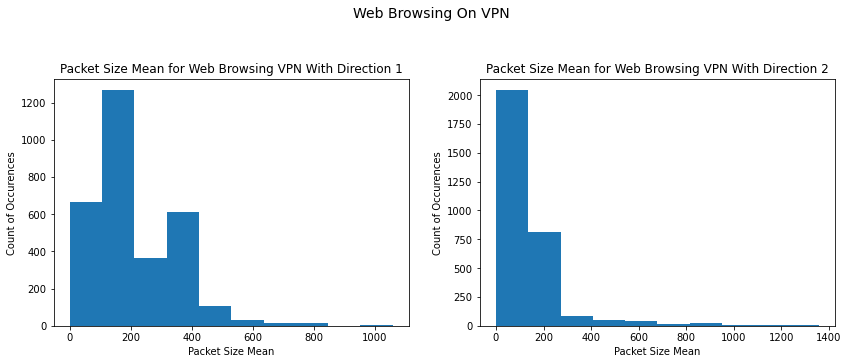

In [139]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.suptitle("Web Browsing On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.title("Packet Size Mean for Web Browsing VPN With Direction 1")
plt.xlabel("Packet Size Mean")
plt.ylabel("Count of Occurences")
plt.hist(mean_no['dir1_packets_mean'])
plt.subplot(2, 2, 2)
plt.title("Packet Size Mean for Web Browsing VPN With Direction 2")
plt.xlabel("Packet Size Mean")
plt.ylabel("Count of Occurences")
plt.hist(mean_no['dir2_packets_mean'])

(array([1242.,  634.,   49.,   19.,   17.,   15.,    4.,    4.,    7.,
         556.]),
 array([   0. ,  134.6,  269.2,  403.8,  538.4,  673. ,  807.6,  942.2,
        1076.8, 1211.4, 1346. ]),
 <BarContainer object of 10 artists>)

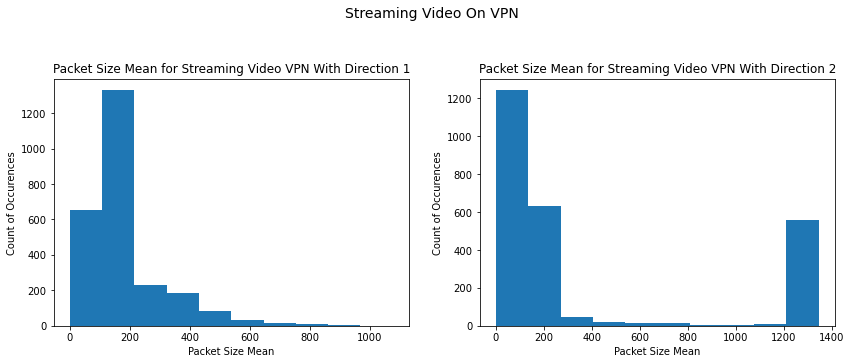

In [140]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.suptitle("Streaming Video On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.title("Packet Size Mean for Streaming Video VPN With Direction 1")
plt.xlabel("Packet Size Mean")
plt.ylabel("Count of Occurences")
plt.hist(mean_yes['dir1_packets_mean'])
plt.subplot(2, 2, 2)
plt.title("Packet Size Mean for Streaming Video VPN With Direction 2")
plt.xlabel("Packet Size Mean")
plt.ylabel("Count of Occurences")
plt.hist(mean_yes['dir2_packets_mean'])

## Analysis of finding the Packet Size Standard Deviations

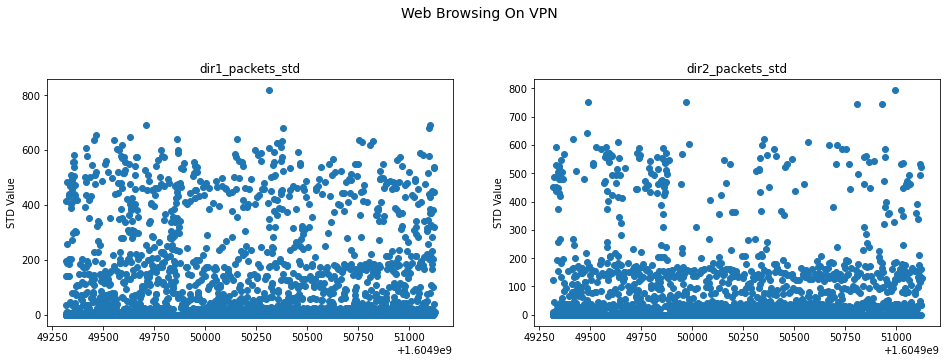

In [141]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.suptitle("Web Browsing On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.ylabel("STD Value")
plt.title("dir1_packets_std")
plt.scatter(std_no['Time'], std_no["dir1_packets_std"])
#plt.ylim((0,1400))
plt.subplot(2, 2, 2)
plt.ylabel("STD Value")
plt.title("dir2_packets_std")
plt.scatter(std_no['Time'], std_no["dir2_packets_std"])
#plt.ylim((0,1400))

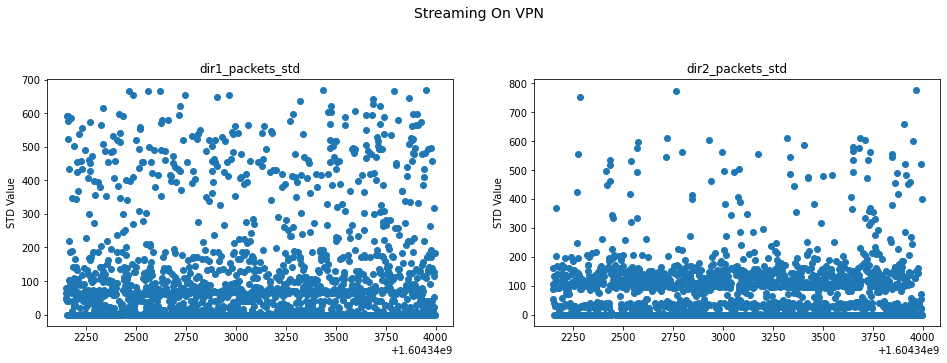

In [142]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.suptitle("Streaming On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.ylabel("STD Value")
plt.title("dir1_packets_std")
plt.scatter(std_yes['Time'], std_yes["dir1_packets_std"])
#plt.ylim((0,1400))
plt.subplot(2, 2, 2)
plt.ylabel("STD Value")
plt.title("dir2_packets_std")
plt.scatter(std_yes['Time'], std_yes["dir2_packets_std"])
#plt.ylim((0,1400))

### When looking at the standard deviations of the 4 graphs above, we can see that the standard deviations of the packet sizes of web browsing vs streaming differ over time based on the direction of the packets sent.

### For direction 1, the two graphs between web browsing and streaming seem higly similar, and have enough standard deviation values all over the place to make me believe that looking at direction 1 might not be the best in providing a reliable feature. However, we do see that in the streaming data, there seems to be quite a bit of values centered around the 100 STD value mark, while the web browsing does not since there seems to almost be a gap at roughly the 100 STD mark. This may not be enough to make the feature reliable, but it is worth investigating further to see why this is occuring and to possibly test this feature to see if it helps the model.

### The reason for creating a feature for the standard deviation values of the packet sizes of direction 2 is that even though the two graphs of streaming and web browsing look similar, there is an apparent difference in how streaming has the majority of data points centered around the 150 STD mark while web browsing has most values centered around the 0-50 mark. Only when looking at those ranges is it possible to see how those graphs look differ even when looking so alike. By looking at these ranges, using the standard deviations of packet sizes for direction 2 could result in a successful feature, which is why I have created it for further analysis.

### The 4 histograms below show the same data but in a different format, where instead the counts of the standard deviations are being displayed to highlight the differences between streaming and browsing with the same differences of standard deviations at roughly the range of 100-150. Further analysis needs to be done to see if these 2 features created are strong enough to influence our future machine learning model.

(array([2.505e+03, 2.830e+02, 1.090e+02, 1.700e+01, 2.300e+01, 4.800e+01,
        5.900e+01, 3.500e+01, 1.000e+00, 5.000e+00]),
 array([  0.        ,  79.47880221, 158.95760441, 238.43640662,
        317.91520882, 397.39401103, 476.87281323, 556.35161544,
        635.83041764, 715.30921985, 794.78802205]),
 <BarContainer object of 10 artists>)

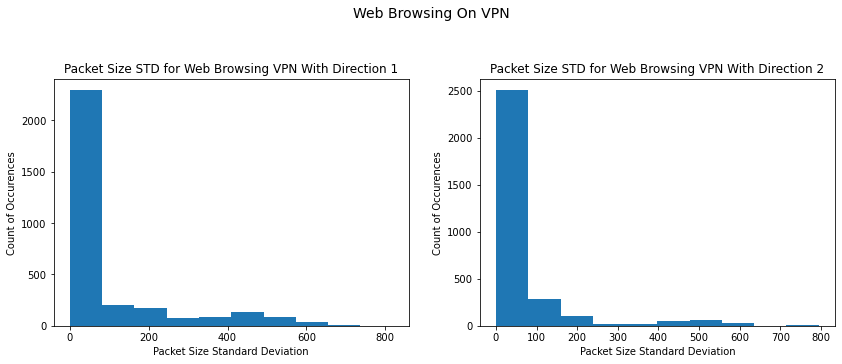

In [143]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.suptitle("Web Browsing On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.title("Packet Size STD for Web Browsing VPN With Direction 1")
plt.xlabel("Packet Size Standard Deviation")
plt.ylabel("Count of Occurences")
plt.hist(std_no['dir1_packets_std'])
plt.subplot(2, 2, 2)
plt.title("Packet Size STD for Web Browsing VPN With Direction 2")
plt.xlabel("Packet Size Standard Deviation")
plt.ylabel("Count of Occurences")
plt.hist(std_no['dir2_packets_std'])

(array([1.66e+03, 6.37e+02, 1.47e+02, 2.20e+01, 2.00e+01, 1.50e+01,
        2.10e+01, 2.10e+01, 1.00e+00, 3.00e+00]),
 array([  0.        ,  77.71103525, 155.4220705 , 233.13310576,
        310.84414101, 388.55517626, 466.26621151, 543.97724677,
        621.68828202, 699.39931727, 777.11035252]),
 <BarContainer object of 10 artists>)

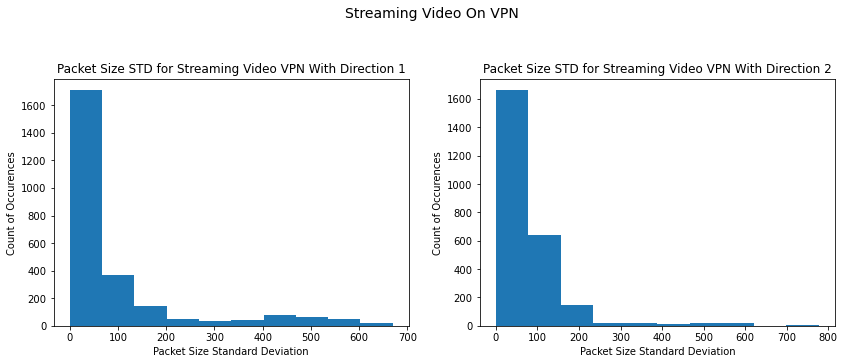

In [144]:
fig, ax = plt.subplots(figsize=(14, 10))
plt.suptitle("Streaming Video On VPN", fontsize=14)
plt.subplot(2, 2, 1)
plt.title("Packet Size STD for Streaming Video VPN With Direction 1")
plt.xlabel("Packet Size Standard Deviation")
plt.ylabel("Count of Occurences")
plt.hist(std_yes['dir1_packets_std'])
plt.subplot(2, 2, 2)
plt.title("Packet Size STD for Streaming Video VPN With Direction 2")
plt.xlabel("Packet Size Standard Deviation")
plt.ylabel("Count of Occurences")
plt.hist(std_yes['dir2_packets_std'])

# Packet Size Analysis

### Since the majority of packet sizes range from 0-300 bytes and 1200-1500 bytes, I think that developing a feature on the counts of those ranges can be beneficial in discovering if streaming is occuring.

In [145]:
# This function takes all the counts of the 0-300bytes for the 1->2 Direction and all the counts
# of the 1200-1500bytes for the 2->1 Direction and creates new columns based off this in the dataframe
def big_byte_count_feature(dataset):        
    df = dataset.copy()
    packet_size_count1 = []
    packet_size_count2 = []
    for i in range(df.shape[0]):
        row = three_cols(df.iloc[i])
        ones = row.loc[row['packet_dir'] == 1]['packet_size']
        twos = row.loc[row['packet_dir'] == 2]['packet_size']
        one_count=0
        two_count=0
        for packet in ones:
            if (int(packet) >= 0) and (int(packet) <= 300):
                one_count += 1
        for packet in twos:
            if (int(packet) >= 1200) and (int(packet) <= 1500):
                two_count += 1
        packet_size_count1.append(one_count)
        packet_size_count2.append(two_count)
    green = "1->2ByteCount_0-300"
    blue = "2->1ByteCount_1200-1500"
    return df.assign(Dir1_ByteCount_0to300 = packet_size_count1, Dir2_ByteCount_1200to1500 = packet_size_count2)

### The way that I would use the two features I created above in my machine learning model would be by looking at the counts of the byte ranges and training my model on this since there is a clear divide between the range count of streaming vs non-streaming, as the count of the ranges are significantly higher when streaming is occuring. This is evident in my examples below for no streaming vs streaming.

In [146]:
#Example of byte count feature extraction on the no streaming dataset:
big_byte_no_streaming = big_byte_count_feature(no)
print(big_byte_no_streaming[['Dir1_ByteCount_0to300', 'Dir2_ByteCount_1200to1500']].head(5))
print("No Streaming Byte Count:")
big_byte_no_streaming[['Dir1_ByteCount_0to300', 'Dir2_ByteCount_1200to1500']].sum()

   Dir1_ByteCount_0to300  Dir2_ByteCount_1200to1500
0                      5                          0
1                      1                          0
2                      0                          0
3                      0                          0
4                      2                          0
No Streaming Byte Count:


Dir1_ByteCount_0to300        15954
Dir2_ByteCount_1200to1500     7624
dtype: int64

In [147]:
#Example of byte count feature extraction on the streaming dataset:
big_byte_streaming = big_byte_count_feature(yes)
print(big_byte_streaming[['Dir1_ByteCount_0to300', 'Dir2_ByteCount_1200to1500']].head(5))
print("Streaming Byte Count:")
big_byte_streaming[['Dir1_ByteCount_0to300', 'Dir2_ByteCount_1200to1500']].sum()

   Dir1_ByteCount_0to300  Dir2_ByteCount_1200to1500
0                   1288                       2232
1                    709                       1402
2                   1646                       3124
3                    585                        876
4                      2                          0
Streaming Byte Count:


Dir1_ByteCount_0to300        194108
Dir2_ByteCount_1200to1500    430519
dtype: int64

# Conclusion

### The features that I have created thus far are 'Dir1_ByteCount_0to300', 'Dir2_ByteCount_1200to1500', 'dir1_packets_mean', 'dir2_packets_mean',  'dir1_packets_std', 'dir2_packets_std'.

# Further Research

### For further analysis, I hope to do more feature extraction by looking at the intervals between the spikes since I think that can play quite a role in identifying if streaming is occuring vs web browsing. The reason I believe so is that if you are streaming video, the data being sent back and forth is more consistent, while web browsing is dependent on what actions the user is doing, meaning that spikes might be more irregular. This is a possibility that I plan to explore next.